In [2]:
import numpy as np   #np-short form of numpy/say alias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r'C:\Users\meenu\Website Performance analysis.csv')  #read dataset

In [4]:
df.head()

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.52666667,0.607594937,4.673333333,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737828,0.634615385,4.29588015,0.494382022,1147
3,Direct,2024041723,188,233,115,39.93991416,0.611702128,4.587982833,0.493562232,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.668449198,4.078125,0.48828125,1044


In [6]:
df.columns=df.iloc[0]
df=df.drop(index=0).reset_index(drop=True)
df.columns=["channel group","DateHour","Users","Sessions","Engaged Sessions","Average engagement time per session","Engaged sessions per user","Events per session","Engagement rate","Event count"]        

In [7]:
df.head()

,channel group,DateHour,Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.52666667,0.607594937,4.673333333,0.48,1402
1,Organic Social,2024041719,208,267,132,32.09737828,0.634615385,4.29588015,0.494382022,1147
2,Direct,2024041723,188,233,115,39.93991416,0.611702128,4.587982833,0.493562232,1069
3,Organic Social,2024041718,187,256,125,32.16015625,0.668449198,4.078125,0.48828125,1044
4,Organic Social,2024041720,175,221,112,46.91855204,0.64,4.529411765,0.50678733,1001


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   channel group                        3182 non-null   object
 1   DateHour                             3182 non-null   object
 2   Users                                3182 non-null   object
 3   Sessions                             3182 non-null   object
 4   Engaged Sessions                     3182 non-null   object
 5   Average engagement time per session  3182 non-null   object
 6   Engaged sessions per user            3182 non-null   object
 7   Events per session                   3182 non-null   object
 8   Engagement rate                      3182 non-null   object
 9   Event count                          3182 non-null   object
dtypes: object(10)
memory usage: 248.7+ KB


In [15]:
df["DateHour"]=pd.to_datetime(df["DateHour"],format="%Y%m%d%H",errors='coerce')   #user coverting datetime.....object to date 

In [ ]:
numeric_cols=df.columns.drop(["channel group","DateHour"]) # Except the channel group and DateHour columns, convert the other columns into numeric data
df[numeric_cols]=df[numeric_cols].apply(pd.to_numeric,errors='coerce')
df["Hour"]=df["DateHour"].dt.hour    # create separate Hour column

In [19]:
df.head()  #show staring 5 row

,channel group,DateHour,Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


In [20]:
df.info() # for cheking data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   channel group                        3182 non-null   object        
 1   DateHour                             3182 non-null   datetime64[ns]
 2   Users                                3182 non-null   int64         
 3   Sessions                             3182 non-null   int64         
 4   Engaged Sessions                     3182 non-null   int64         
 5   Average engagement time per session  3182 non-null   float64       
 6   Engaged sessions per user            3182 non-null   float64       
 7   Events per session                   3182 non-null   float64       
 8   Engagement rate                      3182 non-null   float64       
 9   Event count                          3182 non-null   int64         
 10  Hour        

In [21]:
df.describe() # showing basic statistics

,DateHour,Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
count,3182,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
mean,2024-04-20 01:17:07.278441216,41.935889,51.192646,28.325581,66.644581,0.606450,4.675969,0.503396,242.272470,11.807040
min,2024-04-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2024-04-13 02:15:00,20.000000,24.000000,13.000000,32.103034,0.561404,3.750000,0.442902,103.000000,6.000000
50%,2024-04-20 02:00:00,42.000000,51.000000,27.000000,49.020202,0.666667,4.410256,0.545455,226.000000,12.000000
75%,2024-04-26 22:00:00,60.000000,71.000000,41.000000,71.487069,0.750000,5.217690,0.633333,339.000000,18.000000
max,2024-05-03 23:00:00,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000,23.000000
std,NaN,29.582258,36.919962,20.650569,127.200659,0.264023,2.795228,0.228206,184.440313,6.886686


sessions and user over time

In [22]:
sns.set(style="whitegrid")   #showing grid on graph

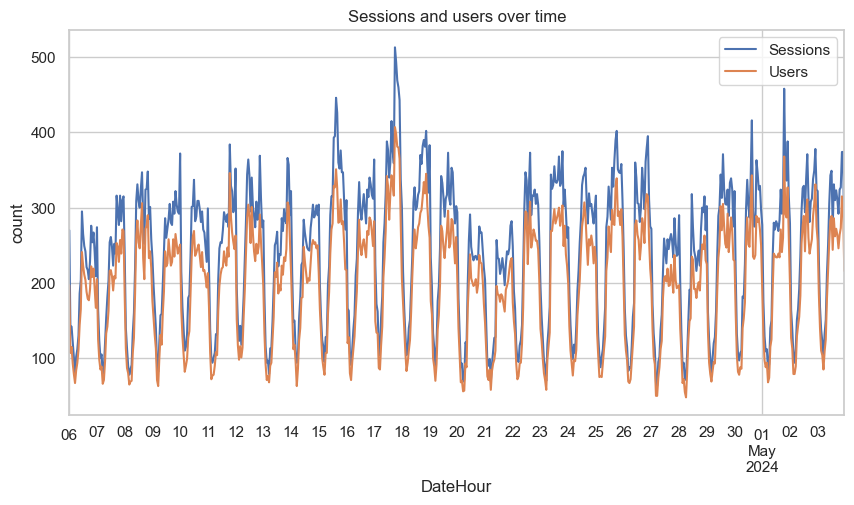

In [24]:
plt.figure(figsize=(10,5))
df.groupby("DateHour")[["Sessions","Users"]].sum().plot(ax=plt.gca())  #for using 3 columns use groupby functions....ax=axis
plt.title("Sessions and users over time")
plt.xlabel("DateHour")
plt.ylabel("count")
plt.show()

Total users by channel

C:\Users\meenu\AppData\Local\Temp\ipykernel_20344\2993414720.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x="channel group",y="Users",estimator=np.sum,palette="viridis")


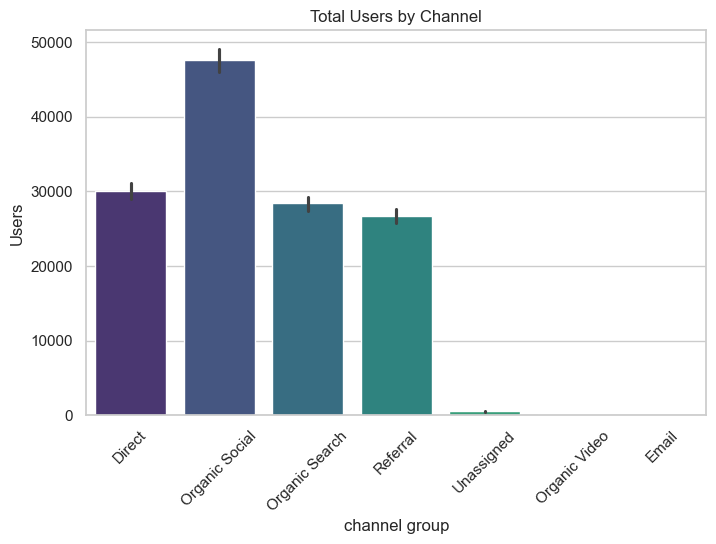

In [25]:
plt.figure(figsize=(8,5))
sns.barplot(data=df,x="channel group",y="Users",estimator=np.sum,palette="viridis")
plt.title("Total Users by Channel")
plt.xticks(rotation=45)  # xticks means write in x axis rotate by 45 degree
plt.show()

Average engagement time by channel

C:\Users\meenu\AppData\Local\Temp\ipykernel_20344\2796789116.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="channel group", y="Average engagement time per session",estimator=np.mean,palette="magma")


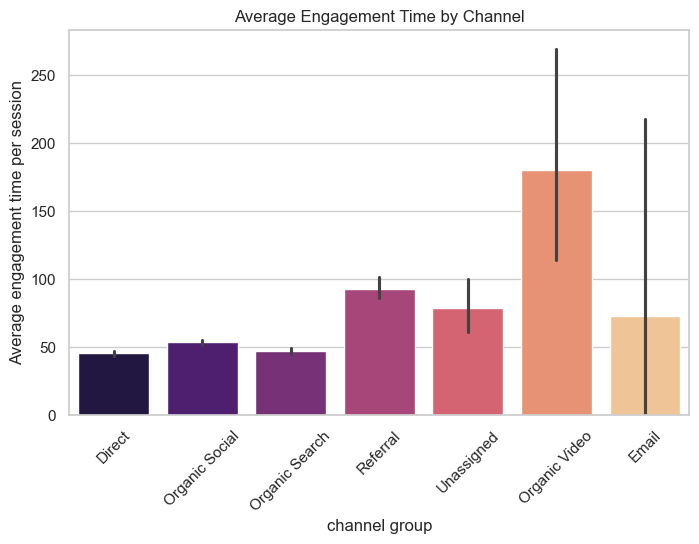

In [31]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="channel group", y="Average engagement time per session",estimator=np.mean,palette="magma")
plt.title("Average Engagement Time by Channel")
plt.xticks(rotation=45)
plt.show()


Engagement Rate Distribution by Channel

C:\Users\meenu\AppData\Local\Temp\ipykernel_20344\2594982963.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="channel group", y="Engagement rate",palette="coolwarm")


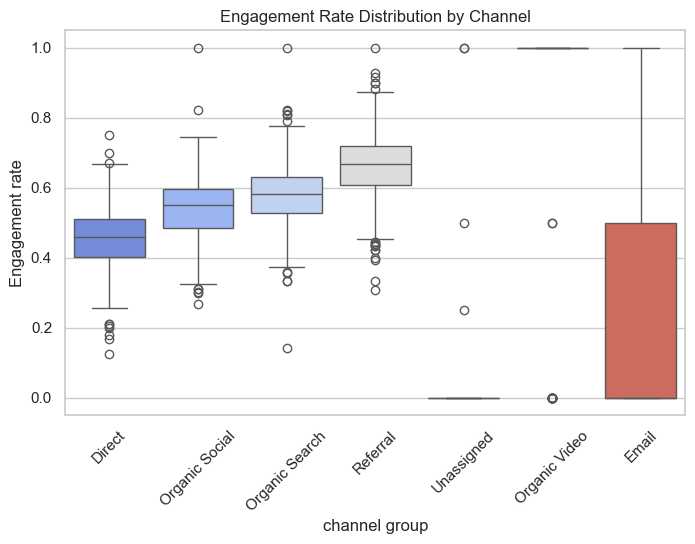

In [34]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="channel group", y="Engagement rate",palette="coolwarm")
plt.title("Engagement Rate Distribution by Channel")
plt.xticks(rotation=45)
plt.show()

Engaged vs non engaged sessions

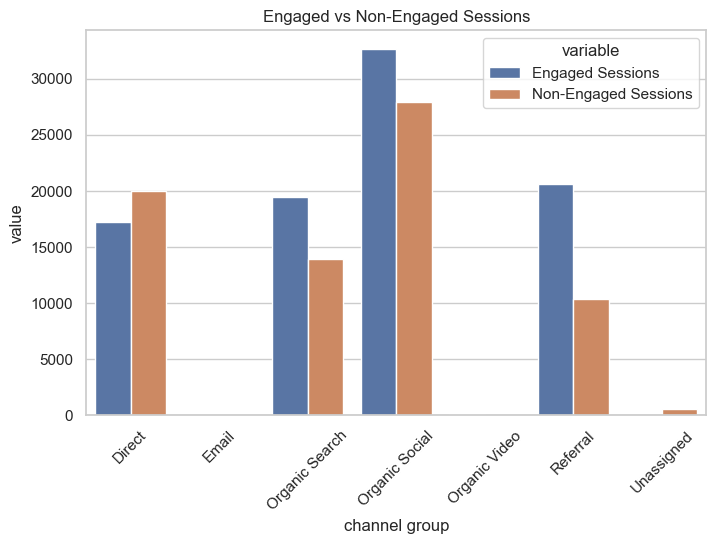

In [46]:
session_df=(df.groupby("channel group")[["Sessions","Engaged Sessions"]].sum().reset_index())
session_df["Non-Engaged Sessions"]=(session_df["Sessions"]-session_df["Engaged Sessions"])
session_df_melted=session_df.melt(id_vars="channel group",value_vars=["Engaged Sessions","Non-Engaged Sessions"])

plt.figure(figsize=(8,5))
sns.barplot(data=session_df_melted, x="channel group", y="value", hue="variable")
plt.title("Engaged vs Non-Engaged Sessions")
plt.xticks(rotation=45)
plt.show()

Traffic by Hour and channel

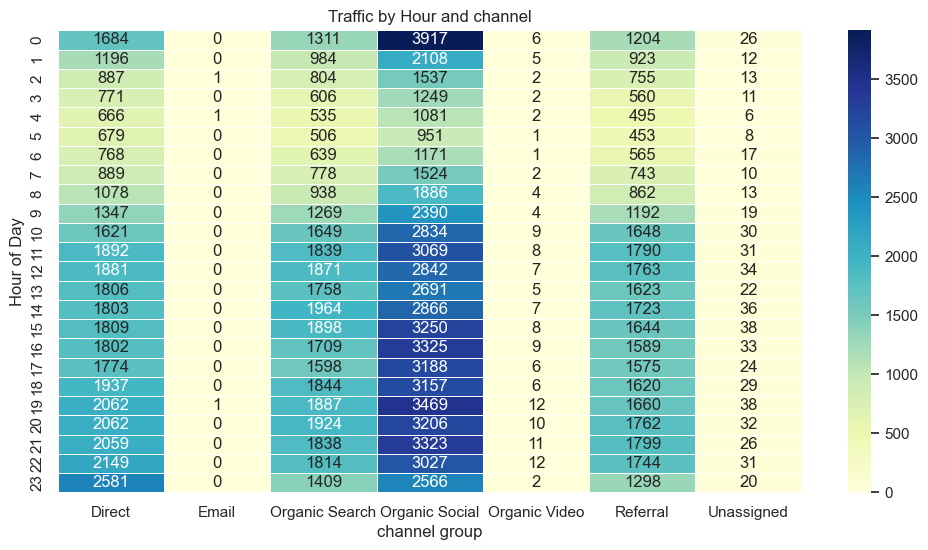

In [48]:
heatmap_data=df.groupby(["Hour","channel group"])["Sessions"].sum().unstack().fillna(0)
plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data,cmap="YlGnBu",linewidths=0.5,annot=True,fmt='.0f')
plt.title("Traffic by Hour and channel")
plt.xlabel("channel group")
plt.ylabel("Hour of Day")
plt.show()

Engagement Rate vs Sessions Over Time

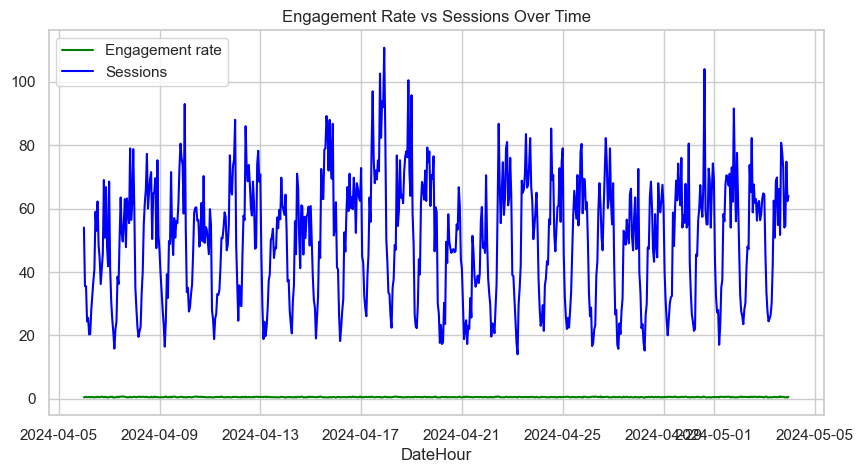

In [54]:
df_plot=df.groupby("DateHour")[["Engagement rate","Sessions"]].mean().reset_index()
plt.figure(figsize=(10,5))
plt.plot(df_plot["DateHour"],df_plot["Engagement rate"],label="Engagement rate",color="green")
plt.plot(df_plot["DateHour"],df_plot["Sessions"],label="Sessions",color="blue")
plt.title("Engagement Rate vs Sessions Over Time")
plt.xlabel("DateHour")         
plt.legend()
plt.grid(True)   
plt.show()         